# Pondpy Template
This Jupyter Notebook template provides a starting point for analyzing roof bays for ponding stability according to IBC 2021 and ASCE 7-16 using the pondpy package.

## How to Use
To use this template simply enter your own data below where prompted and run the processing code at the bottom of the notebook.
Note: Use caution when editing the processing code. Some changes could cause the code to not run correctly.

<small><i>Feel free to delete this section.</i></small>

## Project Information
**Project Name:** Your Project Name

**Project Number:** Your Project Number

**Designer:** Your Initials

**Date:** Today's Date

<small>You can optionally enter project information into the python variables below. These will be used when generating reports for your analyses.</small>

In [1]:
# Project Information
project_name : str = '' # Enter project name as string
project_number : str = '' # Enter project number as string
calc_description : list = ['',] # Enter a list of calculation descriptions as strings for each calculation to be performed

## Analysis Setup

Here, you can enter various pieces of information that will be needed to run the analyses.

<small><b>Note: Be sure to enter all dimensioned criteria in the unit specified. Otherwise, results will not be accurate.</b></small>

### Beam and Joist Sizes

In [2]:
# Beam Sizes
# Enter all AISC W-shape sections that will be used in the analyses into the beam_sizes list.
beam_sizes : list = ['w12x16','w16x26',]

# Joist Sizes
# Enter all SJI K-series joist designations that will be used in the anlyses into the joist_sizes list.
joist_sizes : list = ['14k1',]

### Roof Bay(s) Information

In [3]:
# Enter number of roof bays that you wish to analyze.
n_roof_bays : int = 1

# Enter information about each roof bay into lists. Note: the length of each list below must match the number of roof bays you entered above.

# Enter primary member sizes for each bay. These are typically the 2 girders at each end of the bay.
# Each roof bay will have its own list of members. The sizes entered here must be in the list of sizes that you created above.
primary_members_size : list = [
    ['w16x26', 'w16x26'],
]

# Enter the length of each primary member in ft.
primary_members_length : list = [
    [20, 20],
]

# Enter the location (in ft) and type of each support for each primary member.
# Support types include 'Pinned', 'Roller', and 'Fixed'
# Each support should be entered as a (location, type) pair.
# For example, (0, 'Pinned') indicates that there is a pin-support at the left end of the member.
# Supports can be entered at any point along the length of the beam.
primary_members_support : list = [
    [[(0, 'pinned'), (20, 'pinned'),], [(0, 'pinned'), (20, 'pinned'),],],
]

# Enter secondary member sizes for each bay. These can be either beam sections or joist designations as entered in the lists of sizes above.
# As with the primary members, each roof bay will have its own list. Roof bays do not have to have the same number of secondary members as each other.
# Note: Include all secondary members, including those at the ends of the bays
secondary_members_size : list = [
    ['w12x16','14k1','14k1','14k1','w12x16',],
]

# Enter the length of each secondary member in ft.
secondary_members_length : list = [
    [20, 20, 20, 20, 20],
]

# Enter the location (in ft) and type of each support for each secondary member.
secondary_members_support : list = [
    [[(0, 'pinned'), (20, 'pinned'),], [(0, 'pinned'), (20, 'pinned'),], [(0, 'pinned'), (20, 'pinned'),], [(0, 'pinned'), (20, 'pinned'),], [(0, 'pinned'), (20, 'pinned'),],],
]

# Indicate whether each roof bay is mirrored on the left or right side. This will help the pondpy package determine how much load to place on the end secondary members.
# Enter each row as a pair of booleans, the first of which is for the left side and the second is for the right side.
# For example, (True, False) would indicate that the roof bay is mirrored on the left but not the right.
roof_bay_mirrored : list = [
    (False, False),
]

# Enter the roof slope for each roof bay. The slope should be entered in inches or rise/fall per 12 inches of length.
# For example, 1/4:12 would be entered as 1/4 or simply 0.25. It is not necessary to indicate the direction of slope (i.e. -0.25 vs 0.25)
roof_slope : list = [
    0.25,
]

### Loading Information

In [4]:
# Enter the dead and rain loading information for each roof bay.
# Note: The length of each list below should match the number of roof bays indicated in the previous step.

# Enter the collateral dead load in psf
# Positive load is assumed to act downwards
dead_load_input : list = [
    20,
]

# Enter the depth of impounded water at the secondary drainage inlet in inches
# The depth should be entered as a (static head, hydraulic head) pair.
# For example, (2.0, 3.5) indicates that the static head is 2 inches and the hydraulic head is 3.5 inches.
rain_load_input : list = [
    (2, 2.31),
]

# Indicate whether or not the self-weight of the members should be considered in the analysis of the roof bay.
# Self-weight is considered for all members by default.
include_self_weight = True

## Process Input and Perform Analyses

This section of code will take the information you entered above, process it into a form that is readily usable by the pondpy package, and call the appropriate pondpy analysis methods to analyze each roof bay.

### Import Dependencies

In [5]:
from pondpy4tljh import analyze_roof_bays, show_analysis_summary

from matplotlib import pyplot as plt

### Package Up, Validate, and Run the Analysis on the Input

In [6]:
# Use the analyze_roof_bay function from pondpy4tljh to analyze the input
models = analyze_roof_bays(
    project_name = project_name,
    project_number = project_number,
    calc_description = calc_description,
    beam_sizes = beam_sizes,
    joist_sizes = joist_sizes,
    n_roof_bays = n_roof_bays,
    primary_members_size = primary_members_size,
    primary_members_length = primary_members_length,
    primary_members_support = primary_members_support,
    secondary_members_size = secondary_members_size,
    secondary_members_length = secondary_members_length,
    secondary_members_support = secondary_members_support,
    roof_bay_mirrored = roof_bay_mirrored,
    roof_slope = roof_slope,
    dead_load_input = dead_load_input,
    rain_load_input = rain_load_input,
    include_self_weight = include_self_weight,
)

Packing up the user input...
Validating the input...
Input successfully validated!
Creating the PondPyModel objects for 1 roof bays...
Successfully created the PondPyModel objects for 1 roof bays!
Analyzing the PondPyModel object for roof bay 1...
Successfully analyzed roof bay 1!


### View Results

Once the analyses are complete, you can view the results for each one. View the <a href="https://pondpy.readthedocs.io/en/latest/">pondpy documentation</a> to see results that can be accessed. Some examples are below.

In [7]:
analysis_summary = show_analysis_summary(
    models=models,
    project_name = project_name,
    project_number = project_number,
    calc_description = calc_description,
    beam_sizes = beam_sizes,
    joist_sizes = joist_sizes,
    n_roof_bays = n_roof_bays,
    primary_members_size = primary_members_size,
    primary_members_length = primary_members_length,
    primary_members_support = primary_members_support,
    secondary_members_size = secondary_members_size,
    secondary_members_length = secondary_members_length,
    secondary_members_support = secondary_members_support,
    roof_bay_mirrored = roof_bay_mirrored,
    roof_slope = roof_slope,
    dead_load_input = dead_load_input,
    rain_load_input = rain_load_input,
    include_self_weight = include_self_weight,
)

print(analysis_summary)

  Description Member Member Size  Max Moment (k-ft)  Moment Capacity (k-ft)  \
0  Roof Bay 1    P-1      W16X26              44.02                   110.3   
1  Roof Bay 1    P-2      W16X26              39.72                   110.3   
2  Roof Bay 1    S-1      W12X16               4.55                    50.1   
3  Roof Bay 1    S-2        14K1               8.51                    14.2   
4  Roof Bay 1    S-3        14K1               8.65                    14.2   
5  Roof Bay 1    S-4        14K1               8.51                    14.2   
6  Roof Bay 1    S-5      W12X16               4.55                    50.1   

   Max Shear (k)  Shear Capacity (k)  Deflection (in)   L/d  
0           7.85                70.5            -0.36   667  
1           7.20                70.5            -0.32   750  
2           1.01                52.8            -0.11  2182  
3           1.89                 2.8            -0.52   462  
4           1.92                 2.8            -0.53   4

In [8]:
print(models[0].out_str)

Iteration	|	Water Weight (k)	|	Difference
0		|	3.86			|	----
1		|	4.79			|	0.23903
2		|	4.86			|	0.01435
3		|	4.86			|	0.00107
4		|	4.86			|	8e-05
Analysis finished in 2.09 s.


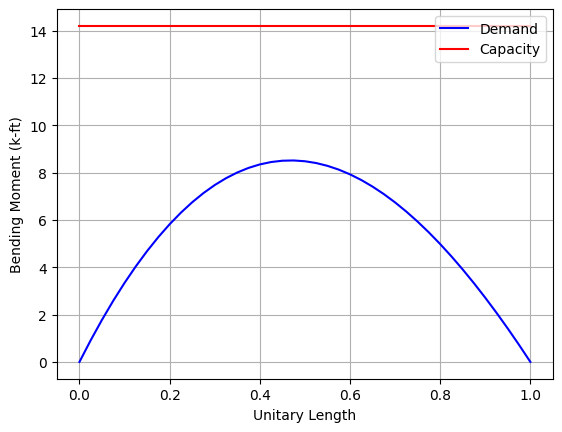

In [9]:
bmd1, _ = models[0].roof_bay_model.secondary_models[1].plot_bmd(with_design=True)
plt.figure(bmd1)
plt.show()

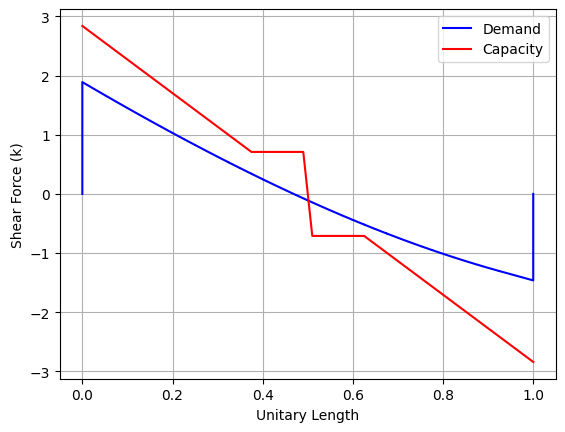

In [10]:
sfd1, _ = models[0].roof_bay_model.secondary_models[1].plot_sfd(with_design=True)
plt.figure(sfd1)
plt.show()

### Disclaimer

<small>By using this template and its underlying source code, user accepts all risk associated with using the the template and the underlying source code. Refer to the <a href="https://github.com/matthew-upshaw/pondpy4tljh/blob/main/LICENSE">package license</a> for more information.</small>

<small><b>pondpy v0.2.0 | pondpy4tljh v0.1.0</b></small>